In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data

In [36]:
df = pd.read_csv("ai_job_dataset.csv")

# fix column name issues

In [38]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# basic info

In [39]:
print(df.head())

    job_id              job_title  salary_usd salary_currency  \
0  AI00001  AI Research Scientist       90376             USD   
1  AI00002   AI Software Engineer       61895             USD   
2  AI00003          AI Specialist      152626             USD   
3  AI00004           NLP Engineer       80215             USD   
4  AI00005          AI Consultant       54624             EUR   

  experience_level employment_type company_location company_size  \
0               SE              CT            China            M   
1               EN              CT           Canada            M   
2               MI              FL      Switzerland            L   
3               SE              FL            India            M   
4               EN              PT           France            S   

  employee_residence  remote_ratio  \
0              China            50   
1            Ireland           100   
2        South Korea             0   
3              India            50   
4         

In [40]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [41]:
print(df.describe())

          salary_usd  remote_ratio  years_experience  job_description_length  \
count   15000.000000  15000.000000      15000.000000            15000.000000   
mean   115348.965133     49.483333          6.253200             1503.314733   
std     60260.940438     40.812712          5.545768              576.127083   
min     32519.000000      0.000000          0.000000              500.000000   
25%     70179.750000      0.000000          2.000000             1003.750000   
50%     99705.000000     50.000000          5.000000             1512.000000   
75%    146408.500000    100.000000         10.000000             2000.000000   
max    399095.000000    100.000000         19.000000             2499.000000   

       benefits_score  
count    15000.000000  
mean         7.504273  
std          1.450870  
min          5.000000  
25%          6.200000  
50%          7.500000  
75%          8.800000  
max         10.000000  


# drop nulls

In [25]:
df = df.dropna()

# Convert salary to numeric just in case


In [26]:
df['salary_usd'] = pd.to_numeric(df['salary_usd'], errors='coerce')
df = df.dropna(subset=['salary_usd'])

# Salary distribution

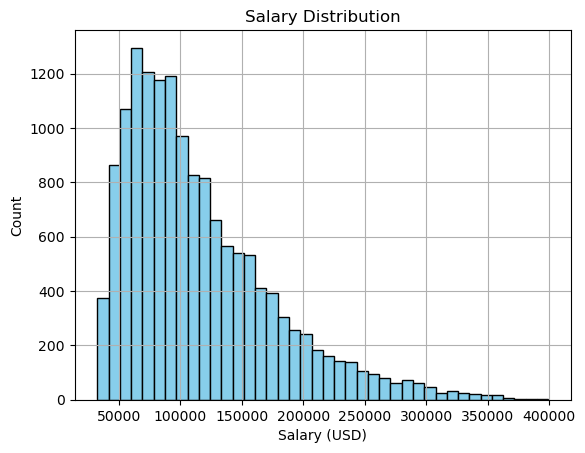

In [27]:
plt.hist(df['salary_usd'], bins=40, color='skyblue', edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary (USD)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Top job titles

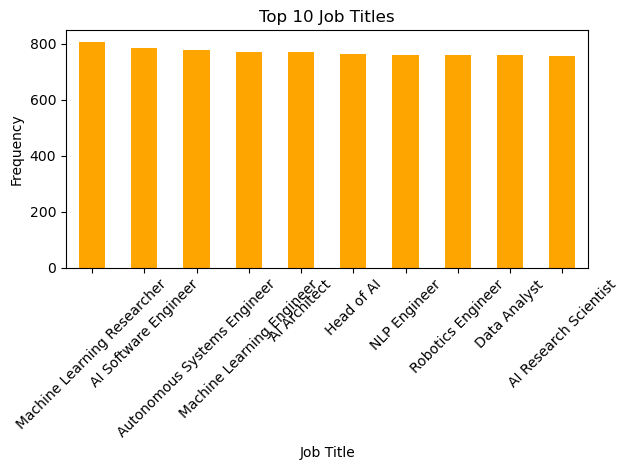

In [28]:
df['job_title'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Country-wise job count


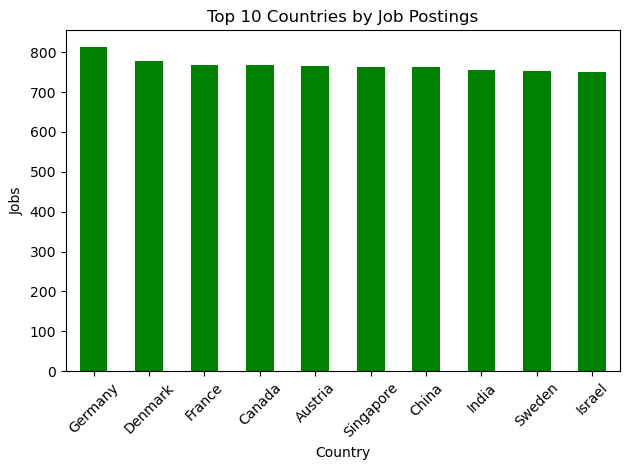

In [42]:
df['company_location'].value_counts().head(10).plot(kind='bar', color='green')
plt.title('Top 10 Countries by Job Postings')
plt.xlabel('Country')
plt.ylabel('Jobs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top hiring companies

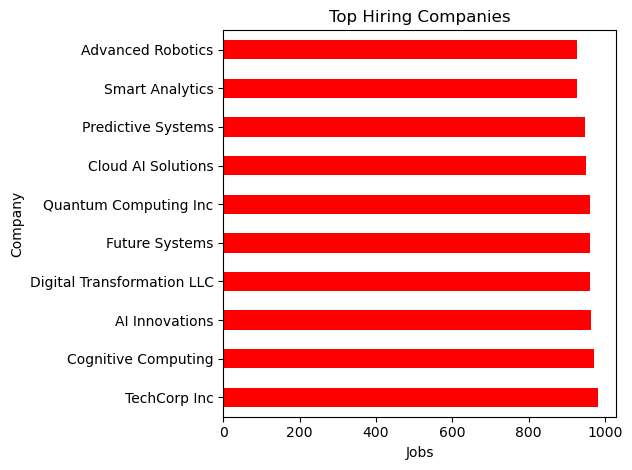

In [30]:
df['company_name'].value_counts().head(10).plot(kind='barh', color='red')
plt.title('Top Hiring Companies')
plt.xlabel('Jobs')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

# Salary vs Experience Level

C:\Users\dvngb\AppData\Local\Temp\ipykernel_3152\50281668.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='experience_level', y='salary_usd', palette='coolwarm')


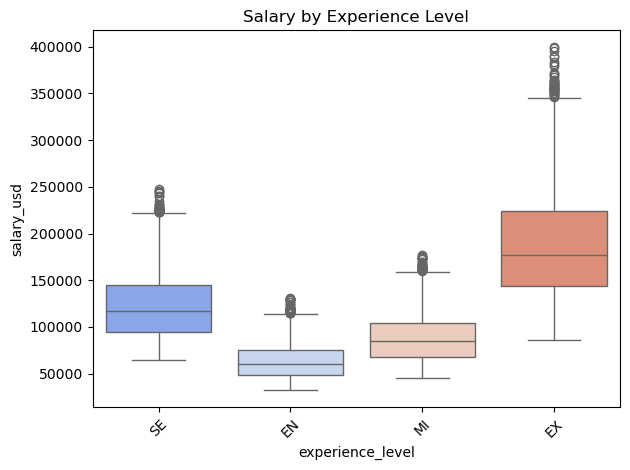

In [43]:
sns.boxplot(data=df, x='experience_level', y='salary_usd', palette='coolwarm')
plt.title('Salary by Experience Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Salary vs Education

C:\Users\dvngb\AppData\Local\Temp\ipykernel_3152\645700396.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='education_required', y='salary_usd', palette='Set2')


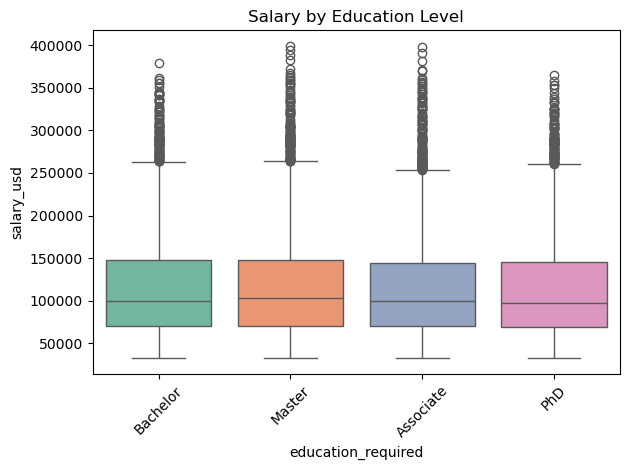

In [32]:
sns.boxplot(data=df, x='education_required', y='salary_usd', palette='Set2')
plt.title('Salary by Education Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Work type pie chart


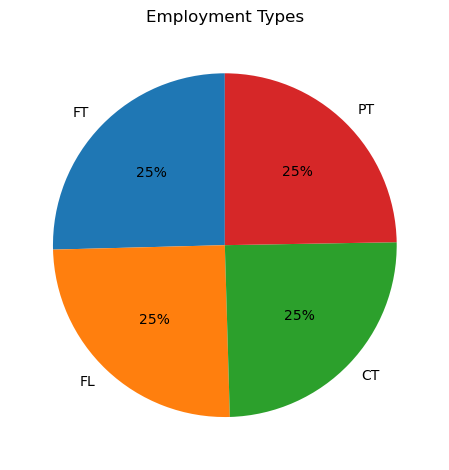

In [33]:
df['employment_type'].value_counts().plot(kind='pie', autopct='%1.0f%%', startangle=90)
plt.title('Employment Types')
plt.ylabel('')
plt.tight_layout()
plt.show()

C:\Users\dvngb\AppData\Local\Temp\ipykernel_3152\736498599.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='salary_usd', y='industry', data=df[df['industry'].isin(top_industry)], ci=None)


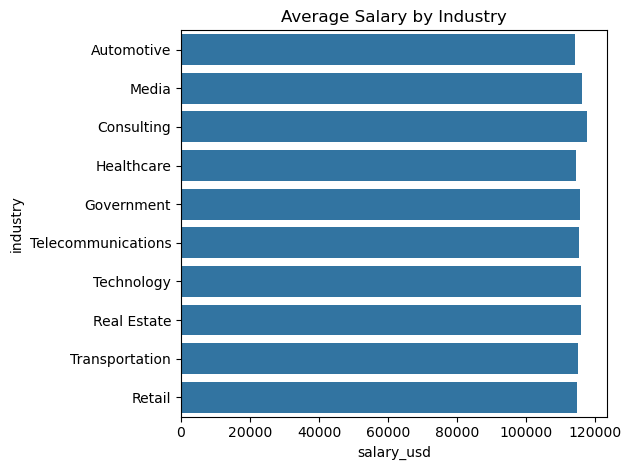

In [34]:
# Top industries and average salary
top_industry = df['industry'].value_counts().head(10).index
sns.barplot(x='salary_usd', y='industry', data=df[df['industry'].isin(top_industry)], ci=None)
plt.title('Average Salary by Industry')
plt.tight_layout()
plt.show()

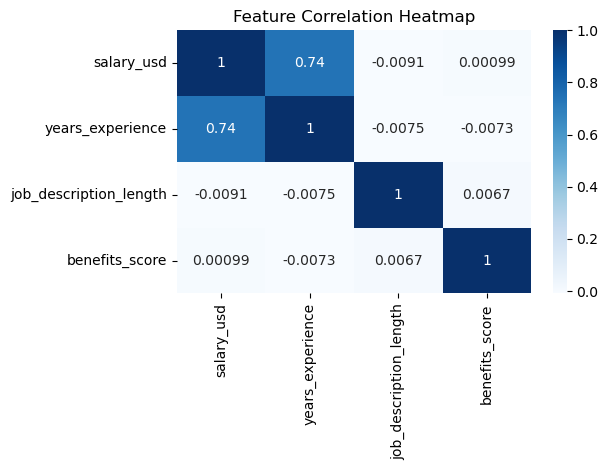

In [35]:
# Heatmap
corr = df[['salary_usd', 'years_experience', 'job_description_length', 'benefits_score']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()